In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s3e1/train.csv")
df = df.drop(['id'], axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


<AxesSubplot:>

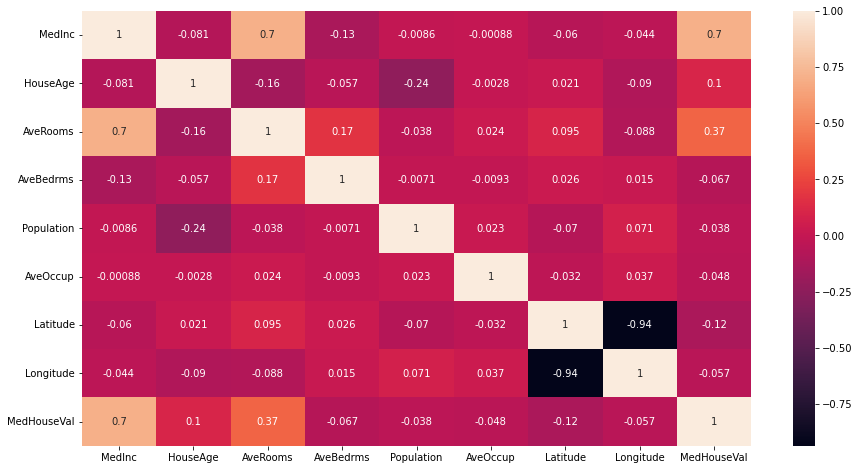

In [3]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [4]:
x = df.drop('MedHouseVal', axis=1)
y = df.MedHouseVal
print(x)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901     37.32   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  
0        -120.12  
1

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [6]:
test=pd.read_csv("/kaggle/input/playground-series-s3e1/test.csv")
test_data = test.drop(['id'], axis=1)
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...
24754,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
xgb_params = {'max_depth': 10,
 'n_estimators': 3200,
 'eta': 0.009066037537711782,
 'subsample': 0.9,
 'colsample_bytree': 0.6000000000000001,
 'colsample_bylevel': 0.8,
 'min_child_weight': 0.00010585538621421443,
 'reg_lambda': 0.005093096835153829,
 'reg_alpha': 3.2325504888724343,
 'gamma': 1.0031274570131565}
xg_reg = xgb.XGBRegressor(**xgb_params)

In [8]:
xg_reg.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=20,verbose=0)
preds = xg_reg.predict(test_data)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


In [9]:
print(len(preds))
preds=preds.reshape(24759,1)
print(preds)
score=xg_reg.score(x_test,y_test)
print(score)

24759
[[0.66384923]
 [1.0965735 ]
 [4.1871777 ]
 ...
 [1.2559557 ]
 [3.7516885 ]
 [3.4352653 ]]
0.75461503180495


In [10]:
submission1 = pd.DataFrame()
submission1['id'] = test['id']
submission1['MedHouseVal'] = preds.reshape((preds.shape[0]))
submission1.to_csv('XGboot.csv', index=False)
submission1

,id,MedHouseVal
0,37137,0.663849
1,37138,1.096573
2,37139,4.187178
3,37140,3.204579
4,37141,2.408911
...,...,...
24754,61891,2.500035
24755,61892,1.908008
24756,61893,1.255956
24757,61894,3.751688
